## Notebook 2 - Location: Singapore
### **Predicting Dengue Fever Incidence and Disease Dynamics under Climate Change in Southeast Asia**
### Master's thesis by Josephine Lutter, supervised by Professor Roberto Henriques

## Table of Contents
<ul>
  <li><a href="#1.-Import">1. Import</a></li>
  <li><a href="#2.-Data-Exploration">2. Data Exploration</a>
    <ul>
      <li><a href="#a.-df_3">a. df_3</a></li>
    </ul>
  </li>
  <li><a href="#3.-Data-Preparation">3. Data Preparation</a>
    <ul>
      <li><a href="#a.-Outlier-Detection">a. Outlier Detection</a></li>
      <li><a href="#b.-Outlier-Removal">b. Outlier Removal</a></li>
    </ul>
  </li>
  <li><a href="#4.-Export">4. Export</a></li>
</ul>

## 1. Import

In [1]:
# Imports for Data Exploration
import os
import math
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
print(statsmodels.__version__)

0.14.1


In [3]:
# Integration of Excel files that have been pre-structured using Mircosoft Excel to guarantee consistent structure

file_singapore = "/Users/Fine/Documents/Master Business Analytics/Thesis/Research Data/Final Data/Singapore/Singapore 2.xlsm"
location = 'Singapore'

df_1 = pd.read_excel(file_singapore, sheet_name='Daily Weather Data')
df_2 = pd.read_excel(file_singapore, sheet_name='Weekly Incidence')
df_3 = pd.read_excel(file_singapore, sheet_name='Monthly Data')

## 2. Data Exploration
Notebook 1 performed the initial data exploration and preprocessing of df_1 and df_2, which hold the daily environmental and weekly incidence data. In this step, df_3 will be integrated, which contains combined and aggregated data from the two raw datasets. Subsequently, profound exploration is performed.

### a. df_3

#### The combined and aggregated environmental variables for the modeling

| Variable           | Unit                 | Description                                                               |
|--------------------|----------------------|---------------------------------------------------------------------------|
| Min_Daily_Prcp     | Millimeters (mm)     | Minimum daily precipitation                                               |
| Max_Daily_Prcp     | Millimeters (mm)     | Maximum daily precipitation                                               |
| Monthly_Avg_Prcp   | Millimeters (mm)     | Monthly average precipitation based on daily temperature reporting        |
| Monthly_Total_Prcp | Millimeters (mm)     | Monthly total precipitation based on cumulated daily precipitation        |
| Monthly_Avg_Temp   | Degrees Celsius (°C) | Monthly average temperature based on daily temperature reporting          |
| Min_Daily_Temp     | Degrees Celsius (°C) | Minimum daily temperature of the respective month                         |
| Max_Daily_Temp     | Degrees Celsius (°C) | Maximum daily temperature of the respective month                         |
| Min_Average_Temp   | Degrees Celsius (°C) | Minimum value of the average daily temperature                            |
| Max_Average_Temp   | Degrees Celsius (°C) | Maximum value of the average daily temperature                            |
| N_Raining_Days     | Degrees Celsius (°C) | Cumulative number of raining days of the respective month                 |

#### Exploratory functions

In [4]:
# Exploring the data types and structure using exploratory functions
df_3.head()

,Year,Month,Date,Incidence,Population,Incidence Rate,Name,Min_Daily_Prcp,Max_Daily_Prcp,Monthly_Avg_Prcp,Monthly_Total_Prcp,Monthly_Avg_Temp,Min_Daily_Temp,Max_Daily_Temp,Min_Average_Temp,Max_Average_Temp,N_Raining_Days
0,2016,1,2016-01-01,2953,5610000,52.638146,"SINGAPORE CHANGI INTERNATIONAL, SN",0,55.9,4.500000,139.5,28.380645,21.259979,32.8,25.3,29.2,15
1,2016,2,2016-02-01,1931,5610000,34.420677,"SINGAPORE CHANGI INTERNATIONAL, SN",0,71.9,6.424138,186.3,27.917241,20.703921,32.7,25.1,29.1,13
2,2016,3,2016-03-01,1452,5610000,25.882353,"SINGAPORE CHANGI INTERNATIONAL, SN",0,2.3,0.164516,5.1,29.045161,24.669344,34.1,28.0,29.8,5
3,2016,4,2016-04-01,1166,5610000,20.784314,"SINGAPORE CHANGI INTERNATIONAL, SN",0,21.8,3.006667,90.2,29.503333,25.300000,35.0,28.4,30.6,15
4,2016,5,2016-05-01,842,5610000,15.008913,"SINGAPORE CHANGI INTERNATIONAL, SN",0,54.9,6.251613,193.8,29.374194,23.900000,34.6,27.7,30.7,14


In [5]:
# Exploring the data types and structure using exploratory functions
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Year                96 non-null     int64         
 1   Month               96 non-null     int64         
 2   Date                96 non-null     datetime64[ns]
 3   Incidence           96 non-null     int64         
 4   Population          96 non-null     int64         
 5   Incidence Rate      96 non-null     float64       
 6   Name                96 non-null     object        
 7   Min_Daily_Prcp      96 non-null     int64         
 8   Max_Daily_Prcp      96 non-null     float64       
 9   Monthly_Avg_Prcp    96 non-null     float64       
 10  Monthly_Total_Prcp  96 non-null     float64       
 11  Monthly_Avg_Temp    96 non-null     float64       
 12  Min_Daily_Temp      96 non-null     float64       
 13  Max_Daily_Temp      96 non-null     float64       
 

In [6]:
# Exploring the data types and structure using exploratory functions
df_3.describe().T

,count,mean,min,25%,50%,75%,max,std
Year,96.0,2019.5,2016.0,2017.75,2019.5,2021.25,2023.0,2.303316
Month,96.0,6.5,1.0,3.75,6.5,9.25,12.0,3.470174
Date,96,2019-12-16 11:00:00,2016-01-01 00:00:00,2017-12-24 06:00:00,2019-12-16 12:00:00,2021-12-08 18:00:00,2023-12-01 00:00:00,NaN
Incidence,96.0,1228.072917,136.0,315.0,793.5,1394.25,8014.0,1423.660695
Population,96.0,5657500.0,5450000.0,5610000.0,5640000.0,5692500.0,5920000.0,123091.750119
Incidence Rate,96.0,21.648592,2.411348,5.592431,13.878436,24.562693,140.843585,25.110267
Min_Daily_Prcp,96.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Max_Daily_Prcp,96.0,47.898958,0.3,30.0,43.7,58.625,238.5,33.889236
Monthly_Avg_Prcp,96.0,5.992201,0.012,3.784677,5.470476,8.031452,22.341935,3.54823
Monthly_Total_Prcp,96.0,182.705208,0.3,117.325,163.85,240.725,692.6,109.050407


In [7]:
# Besides data visualization, there are multiple tests to verify if a time series is stationary
# In the following, the Augmented Dickey-Fuller (ADF) test is performed
# Inspiration: https://medium.com/@JDEconomics/how-to-test-for-stationarity-in-time-series-data-using-python-44d82890aa9d

# Specifying the subset of variables without "Min_Daily_Prcp" due to being constant
environmental_variables = [
    "Max_Daily_Prcp", "Monthly_Avg_Prcp", "Monthly_Total_Prcp",
    "Monthly_Avg_Temp", "Min_Daily_Temp", "Max_Daily_Temp",
    "Min_Average_Temp", "Max_Average_Temp", "N_Raining_Days"
]

# List to store non-stationary variables
non_stationary = []

# Perform ADF test for selected variables
for variable in environmental_variables:
    result = adfuller(df_3[variable])
    print(f'{variable} shows a p-value of: {result[1]:0.3f}') # Rounded here, therefore shows 0.000 in some instances
    if result[1] <= 0.05:
        print('Test Result: \033[92mStationary\033[0m') 
    else:
        print('Test Result: \033[91mNon-Stationary\033[0m')
        non_stationary.append(variable)

Max_Daily_Prcp shows a p-value of: 0.000
Test Result: Stationary
Monthly_Avg_Prcp shows a p-value of: 0.426
Test Result: Non-Stationary
Monthly_Total_Prcp shows a p-value of: 0.414
Test Result: Non-Stationary
Monthly_Avg_Temp shows a p-value of: 0.130
Test Result: Non-Stationary
Min_Daily_Temp shows a p-value of: 0.000
Test Result: Stationary
Max_Daily_Temp shows a p-value of: 0.046
Test Result: Stationary
Min_Average_Temp shows a p-value of: 0.000
Test Result: Stationary
Max_Average_Temp shows a p-value of: 0.307
Test Result: Non-Stationary
N_Raining_Days shows a p-value of: 0.944
Test Result: Non-Stationary


#### Result

Descriptive statistics have been explored. Stationary was tested. Five of the nine monthly variables were tested non-stationary; hence, statistical characteristics change over time, which might harm model performance. However, the final trend analysis with combined locations will be performed in notebook 3. There, it will be checked if further methods need to be implemented to achieve stationarity.

#### Exploratory visualizations

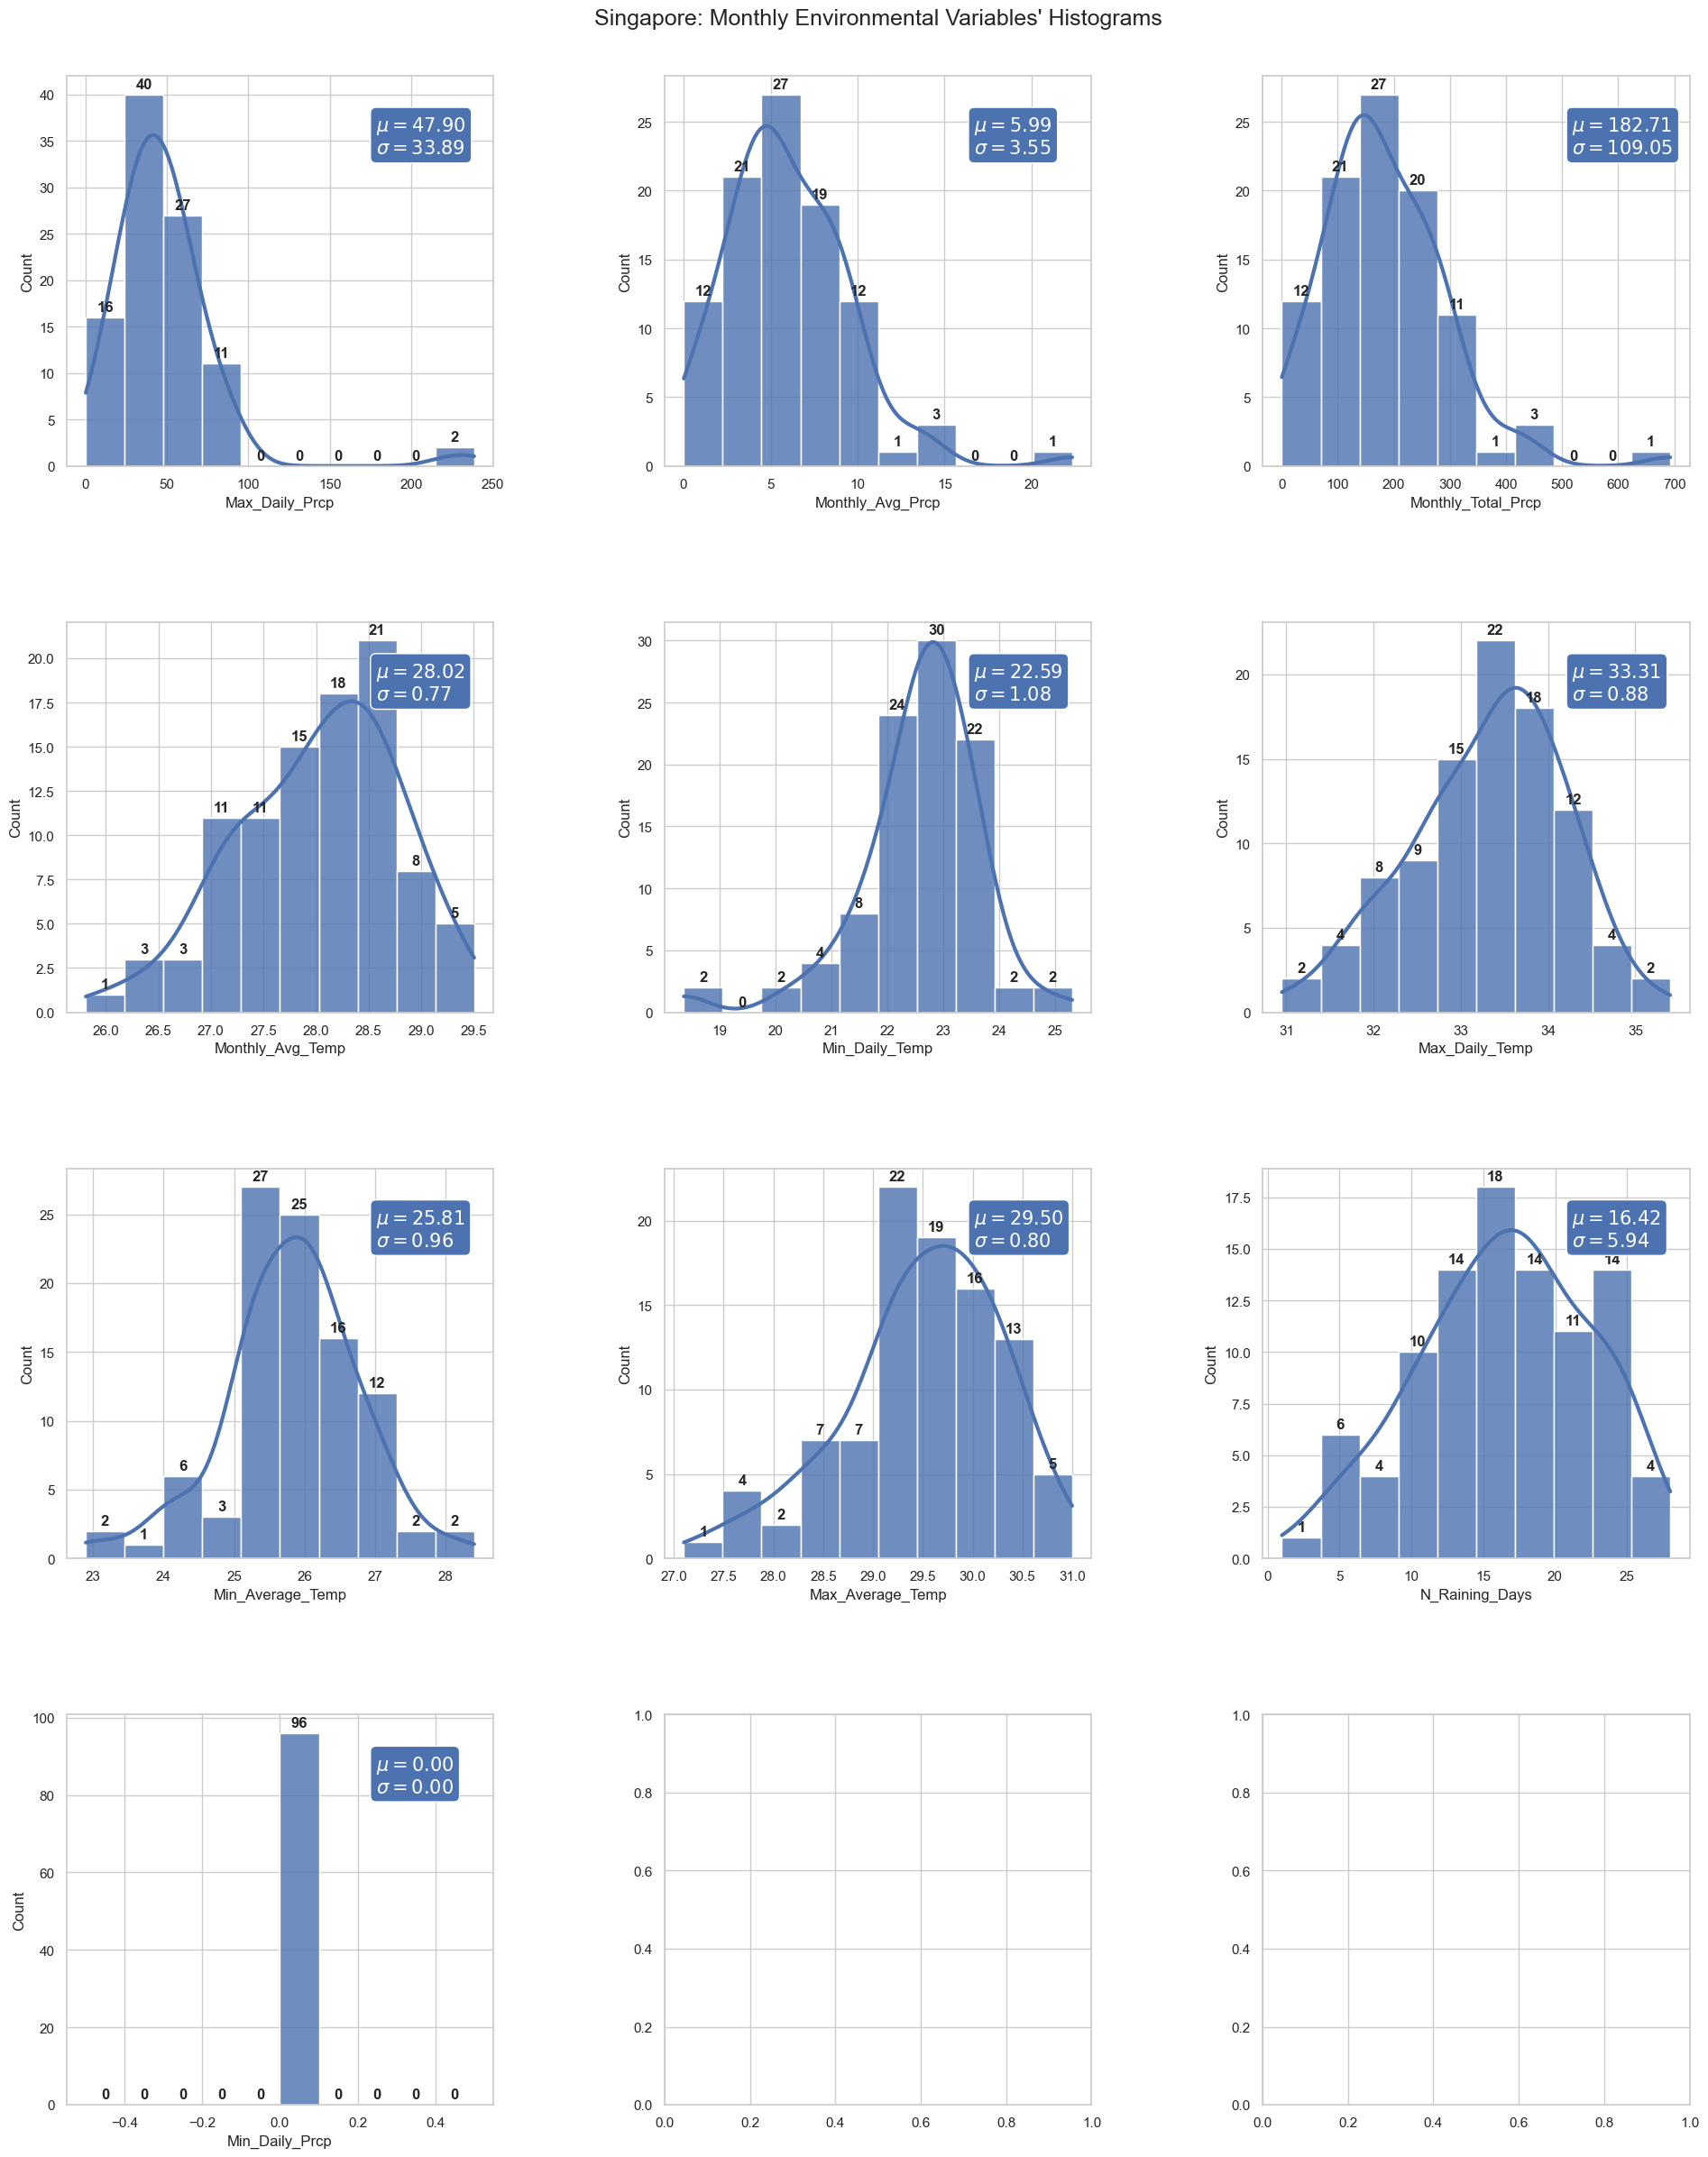

In [8]:
# Histogram for univariate analysis
# Draw a histogram for each numerical column to explore the data distribution, structure, and detect outliers of df_3
# Afterward, data will be scaled; therefore, outlier treatment is significant 

# Append the environmental variable Min_Daily_Temp for the overall exploratory analysis
environmental_variables.append("Min_Daily_Prcp")

sns.set(style="whitegrid")

fig, axes = plt.subplots(4, math.ceil(len(environmental_variables) / 4), figsize=(20, 25))

for ax, feat in zip(axes.flatten(), environmental_variables):
    ax.set_ylabel('Count')
    # Plot histogram
    counts, bins, patches = ax.hist(df_3[feat].dropna(), alpha=0.6) 
    
    # Adding KDE and statistics
    sns.histplot(data=df_3, x=feat, bins=bins, kde=True, ax=ax, line_kws={'lw': 3})
    
    # Adding annotations for counts
    for count, patch in zip(counts, patches):
        ax.annotate(str(int(count)), xy=(patch.get_x() + patch.get_width() / 2, patch.get_height()),
                    xytext=(0, 5), textcoords='offset points',
                    ha='center', fontsize=12, fontweight='bold')
    
    # Adding mean and standard deviation text
    ax.text(0.725, 0.9, f'$\mu={df_3[feat].mean():0.2f}$\n$\sigma={df_3[feat].std():0.2f}$',
            transform=ax.transAxes, fontsize=15, verticalalignment='top', color='white',
            bbox=dict(boxstyle='round'))
    
plt.suptitle(f"{location}: Monthly Environmental Variables' Histograms", fontsize=18)
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, hspace=0.4, wspace=0.4)
plt.savefig(os.path.join(f"{location}_monthly_environmental_variables_histograms.png"), dpi=200)
plt.show()

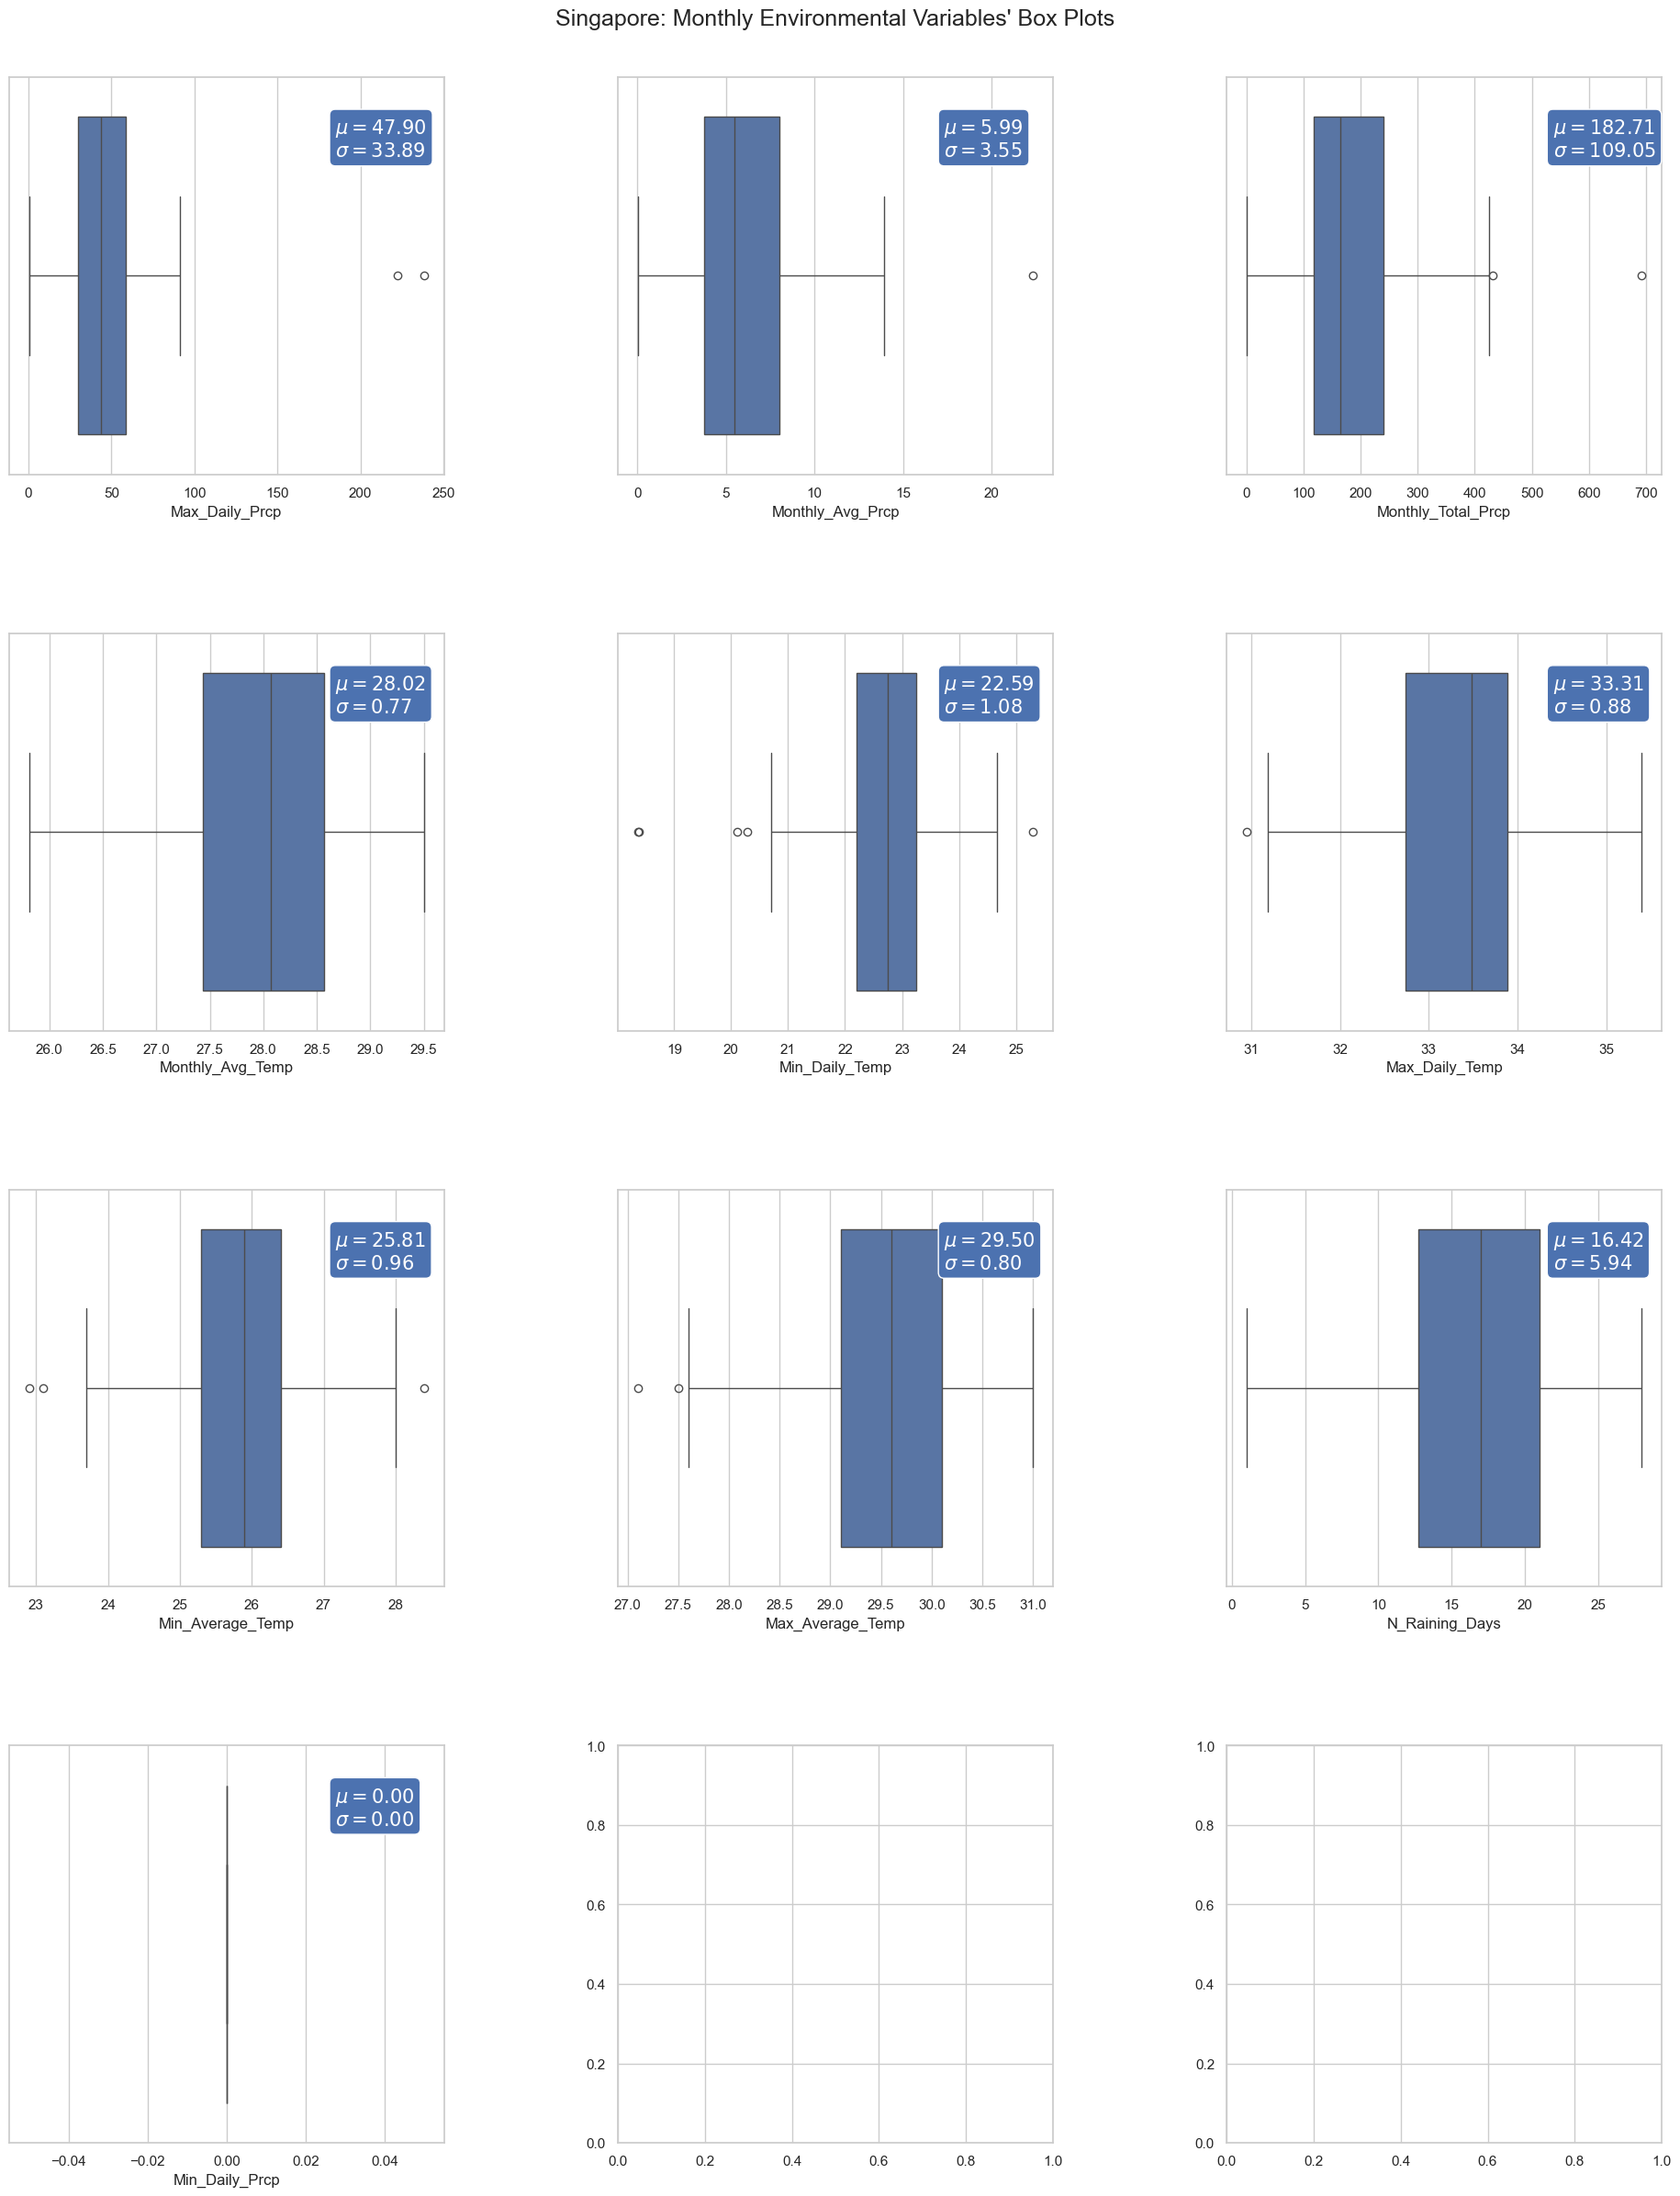

In [9]:
# Boxplots for univaraite analysis
# Draw a histogram for each numerical column to explore the data distribution, structure, and detect outliers of df_3
# Aftwerward, data will be scaled. Therefore, outlier treatment is significant 
# Inspiration: https://medium.com/analytics-vidhya/how-to-remove-outliers-for-machine-learning-24620c4657e8

fig, axes = plt.subplots(4, math.ceil(len(environmental_variables) / 4), figsize=(20, 25))

for ax, feat in zip(axes.flatten(), environmental_variables):
    sns.boxplot(x=df_3[feat], ax=ax, color="b")
    
    # Adding mean and standard deviation text
    ax.text(0.75, 0.9, f'$\mu={df_3[feat].mean():0.2f}$\n$\sigma={df_3[feat].std():0.2f}$',
            transform=ax.transAxes, fontsize=15, verticalalignment='top', color='white',
            bbox=dict(boxstyle='round', facecolor='b'))
    
plt.suptitle(f"{location}: Monthly Environmental Variables' Box Plots", fontsize=18)
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, hspace=0.4, wspace=0.4)
plt.savefig(os.path.join(f"{location}_monthly_environmental_variables_boxplots.png"), dpi=200)
plt.show()

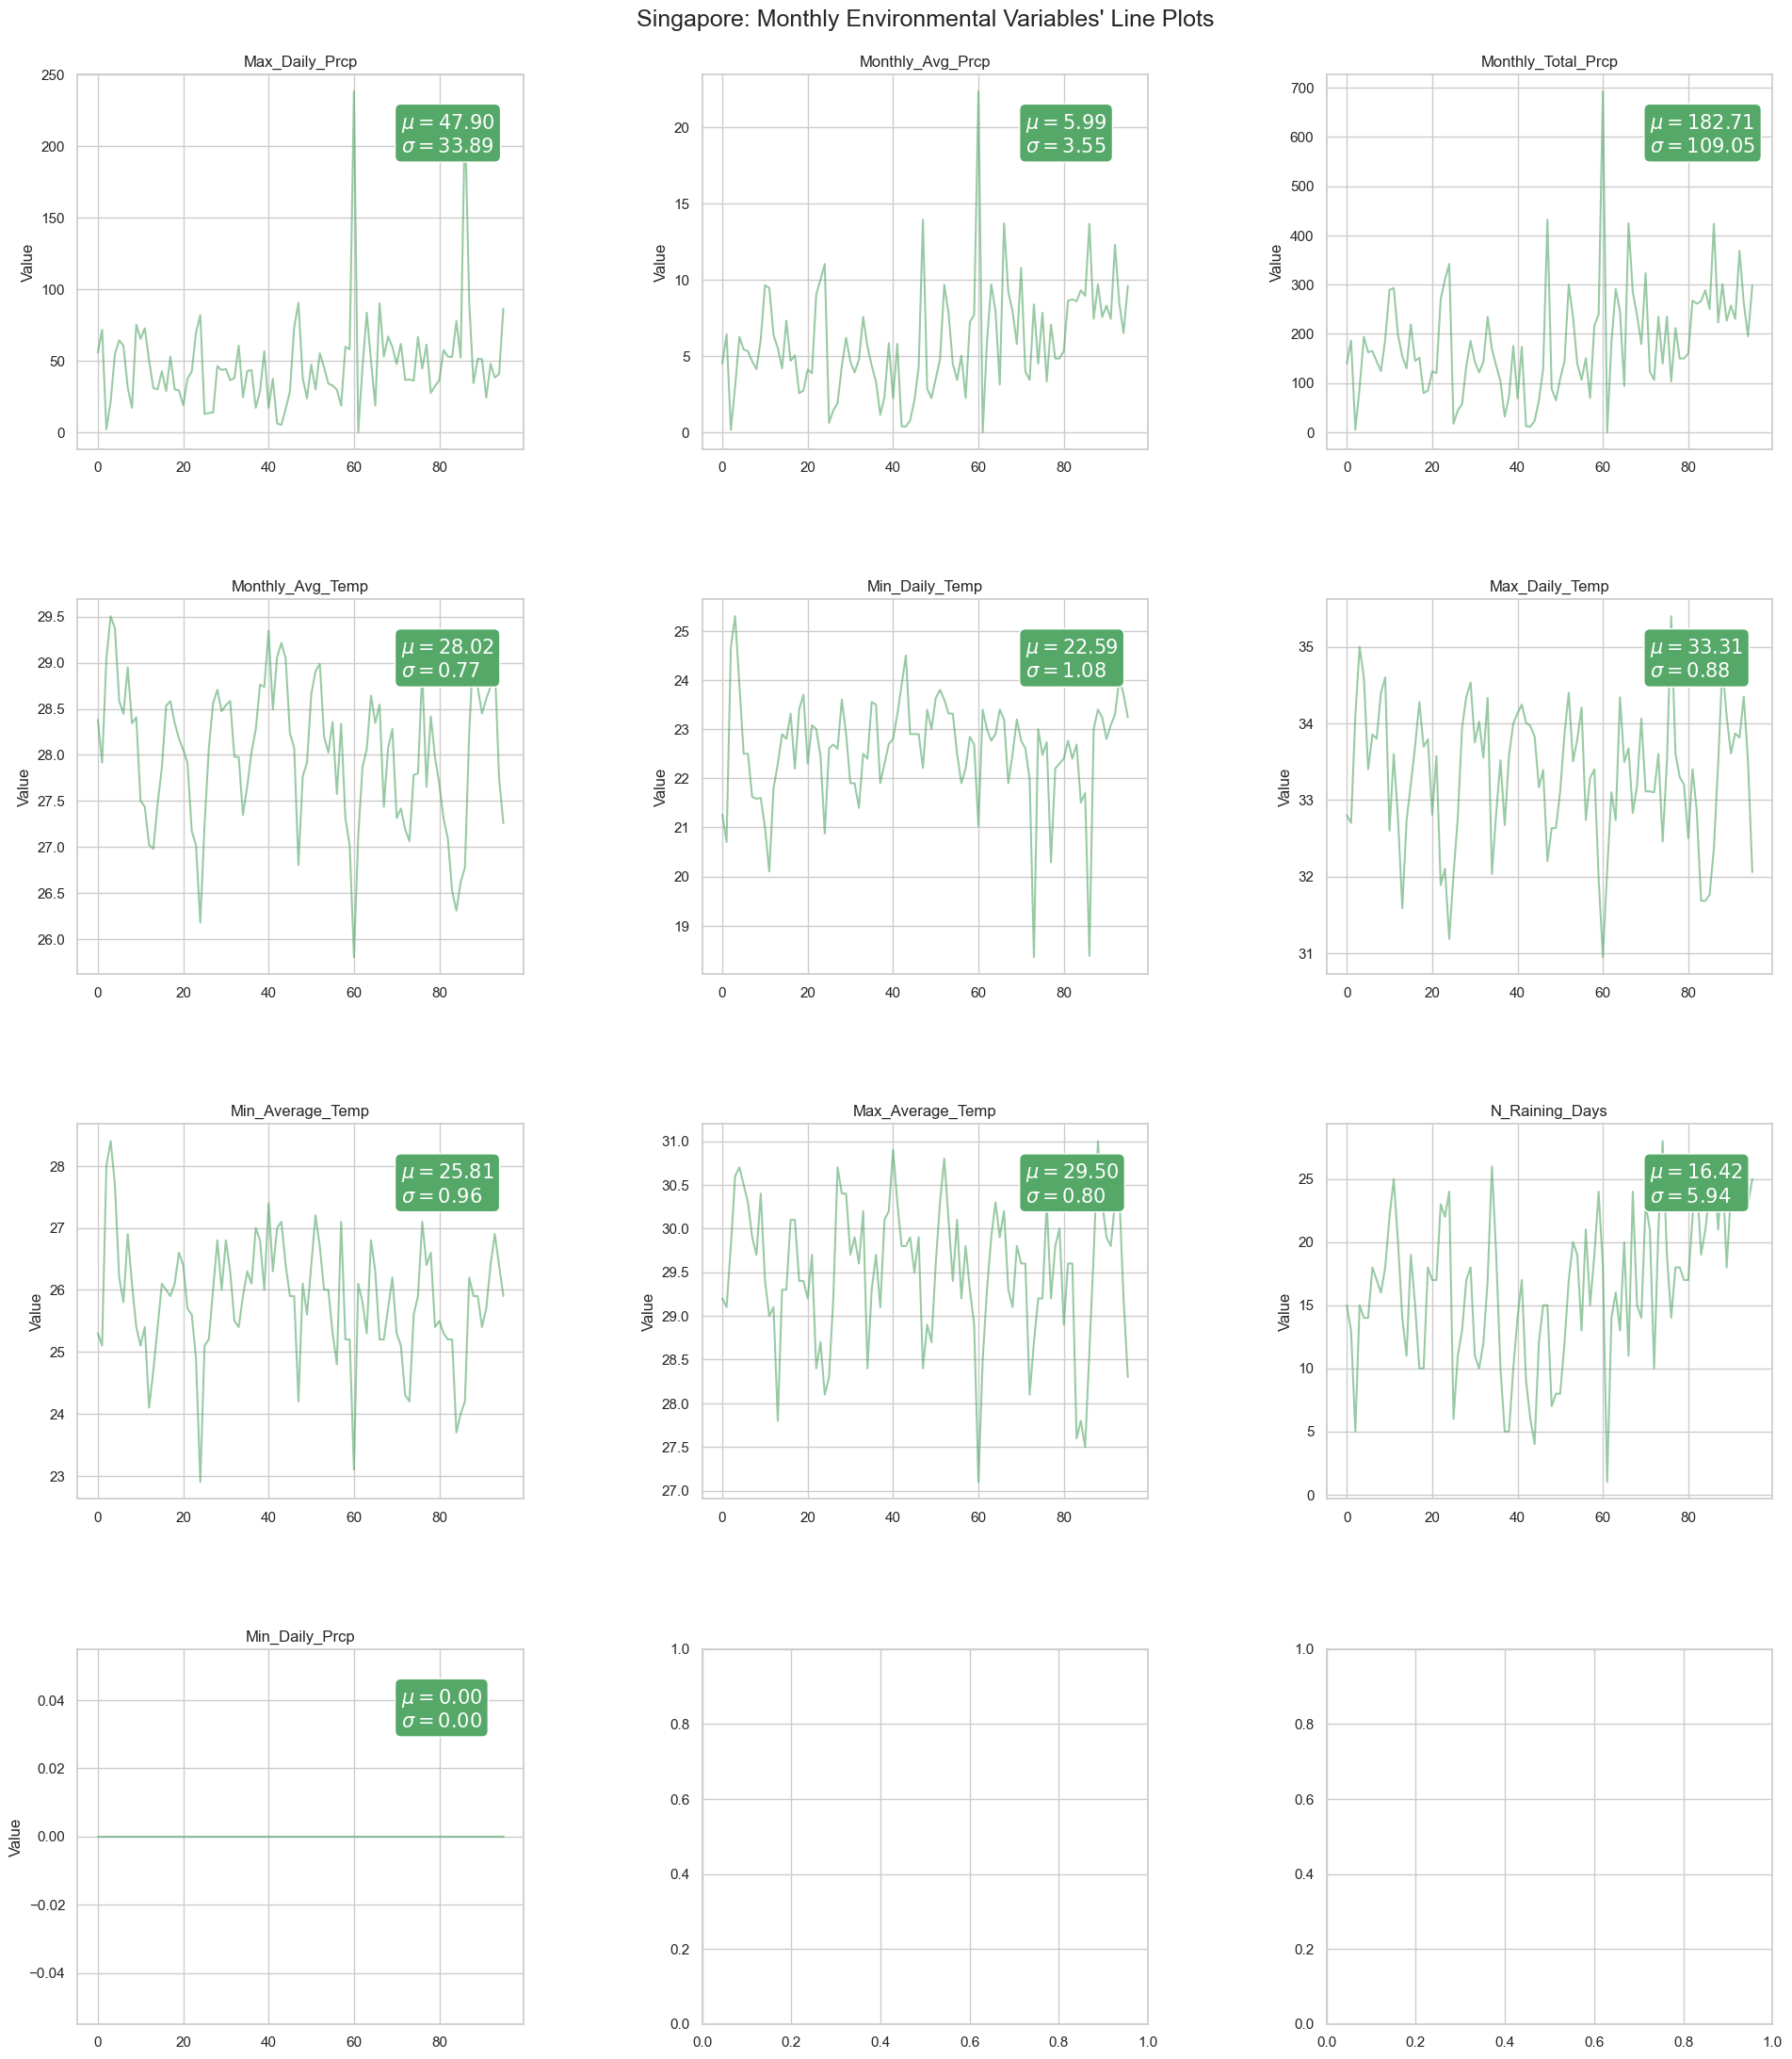

In [10]:
# Line plot

fig, axes = plt.subplots(4, math.ceil(len(environmental_variables) / 4), figsize=(20, 23))

for ax, feat in zip(axes.flatten(), environmental_variables):
    ax.set_ylabel('Value')
    # Plot line plot
    ax.plot(df_3[feat], color="g", alpha=0.6) 
    
    # Adding mean and standard deviation text
    ax.text(0.725, 0.9, f'$\mu={df_3[feat].mean():0.2f}$\n$\sigma={df_3[feat].std():0.2f}$',
            transform=ax.transAxes, fontsize=15, verticalalignment='top', color='white',
            bbox=dict(boxstyle='round', facecolor='g'))
    
    ax.set_title(feat, fontsize=12)
    
plt.suptitle(f"{location}: Monthly Environmental Variables' Line Plots", fontsize=18)
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, hspace=0.4, wspace=0.4)
plt.savefig(os.path.join(f"{location}_monthly_environmental_variables_lineplots.png"), dpi=200)
plt.show()

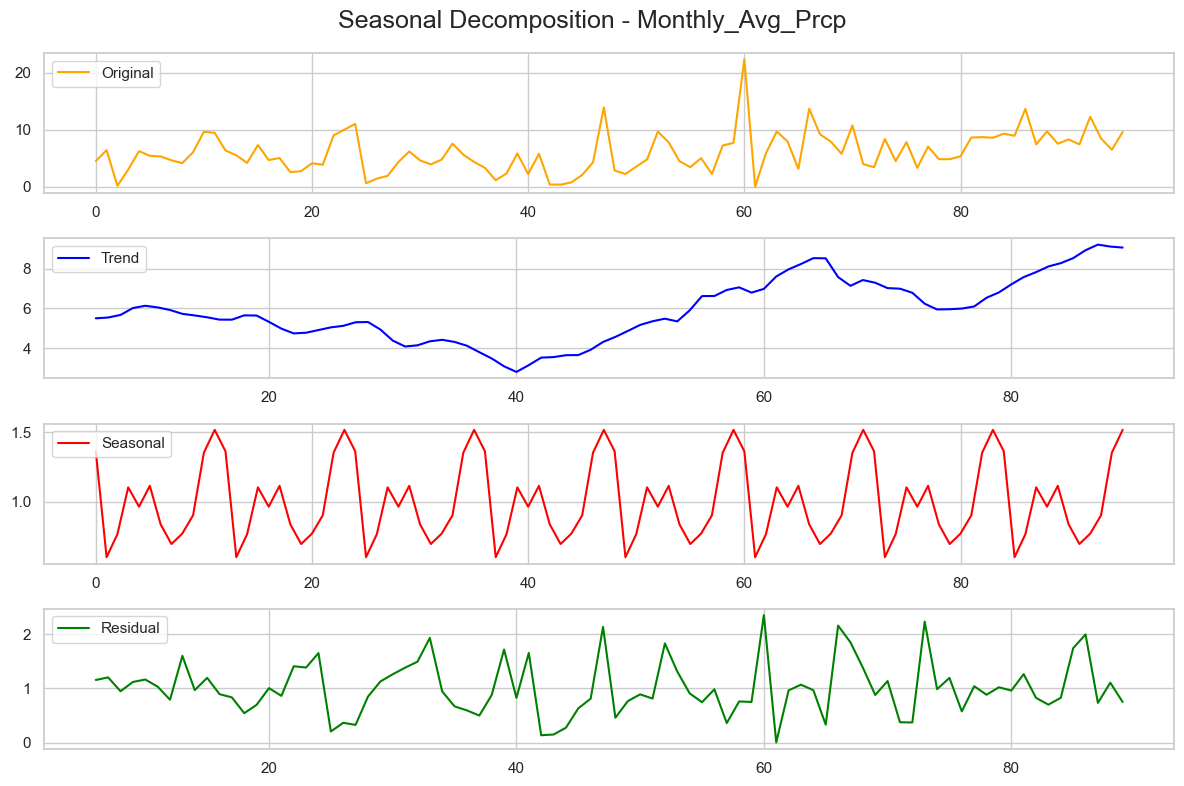

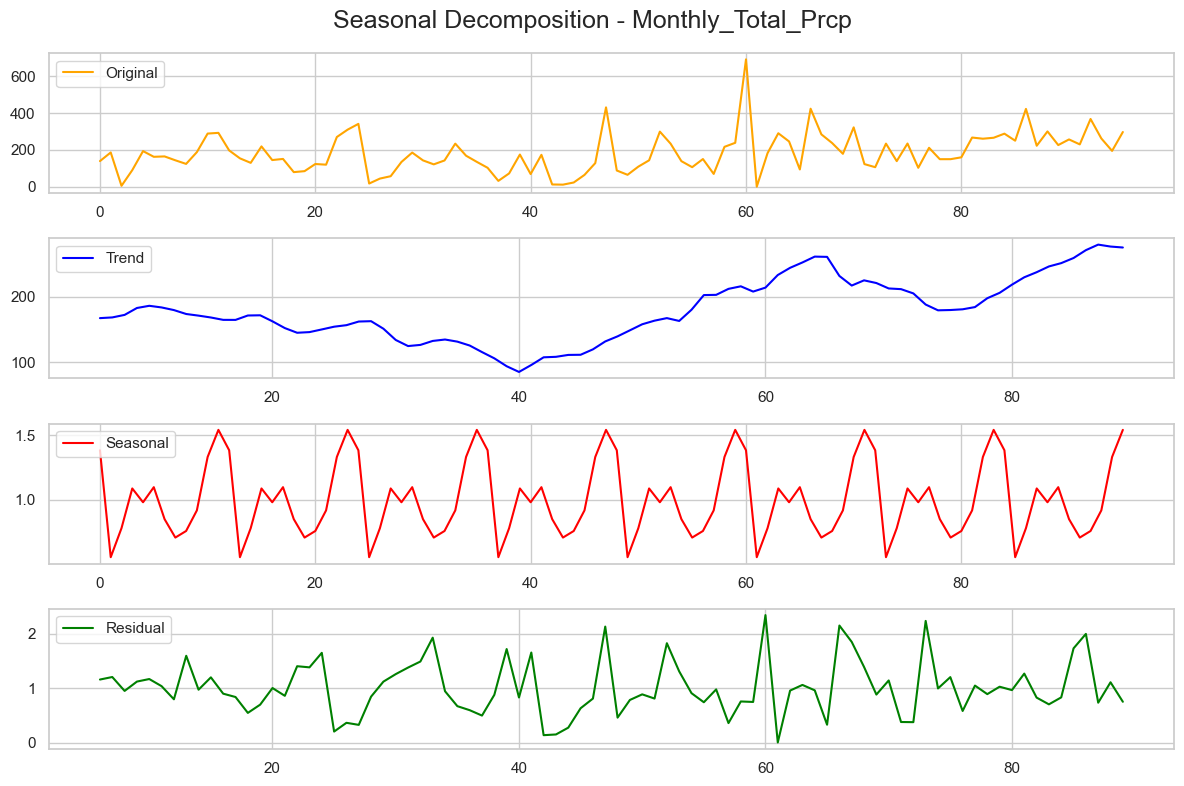

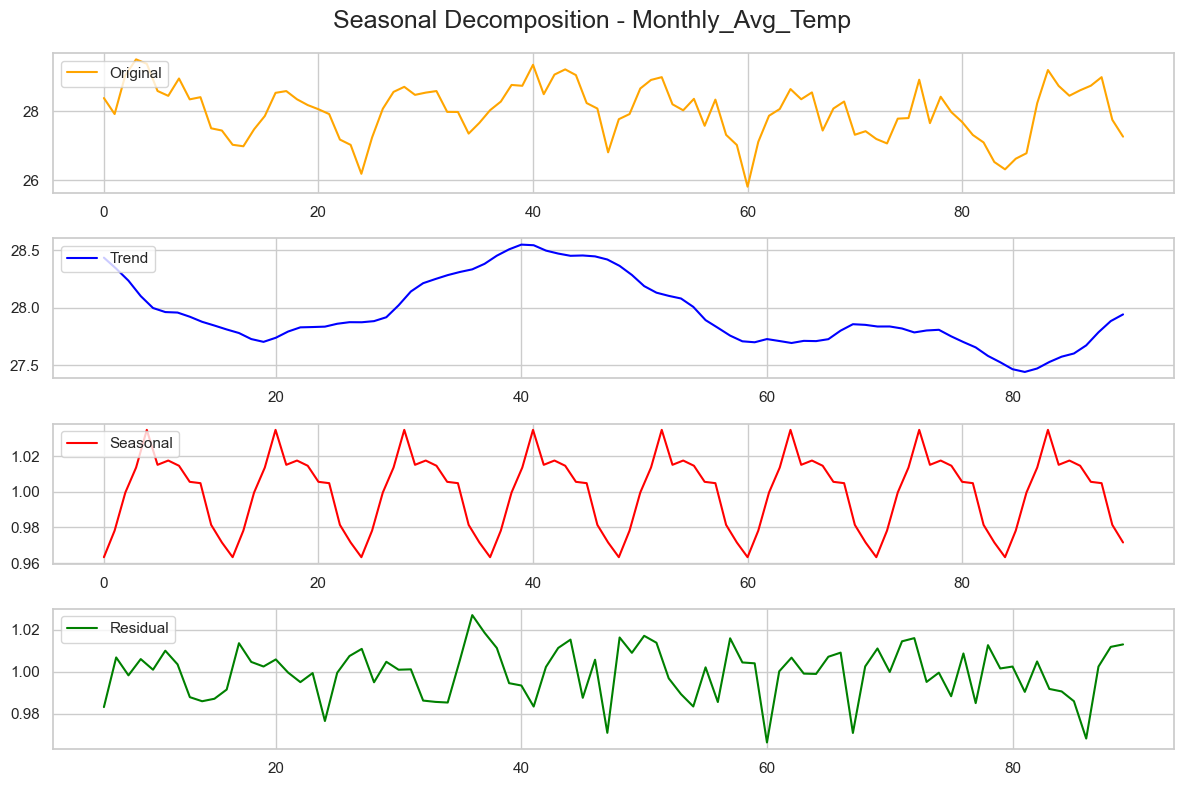

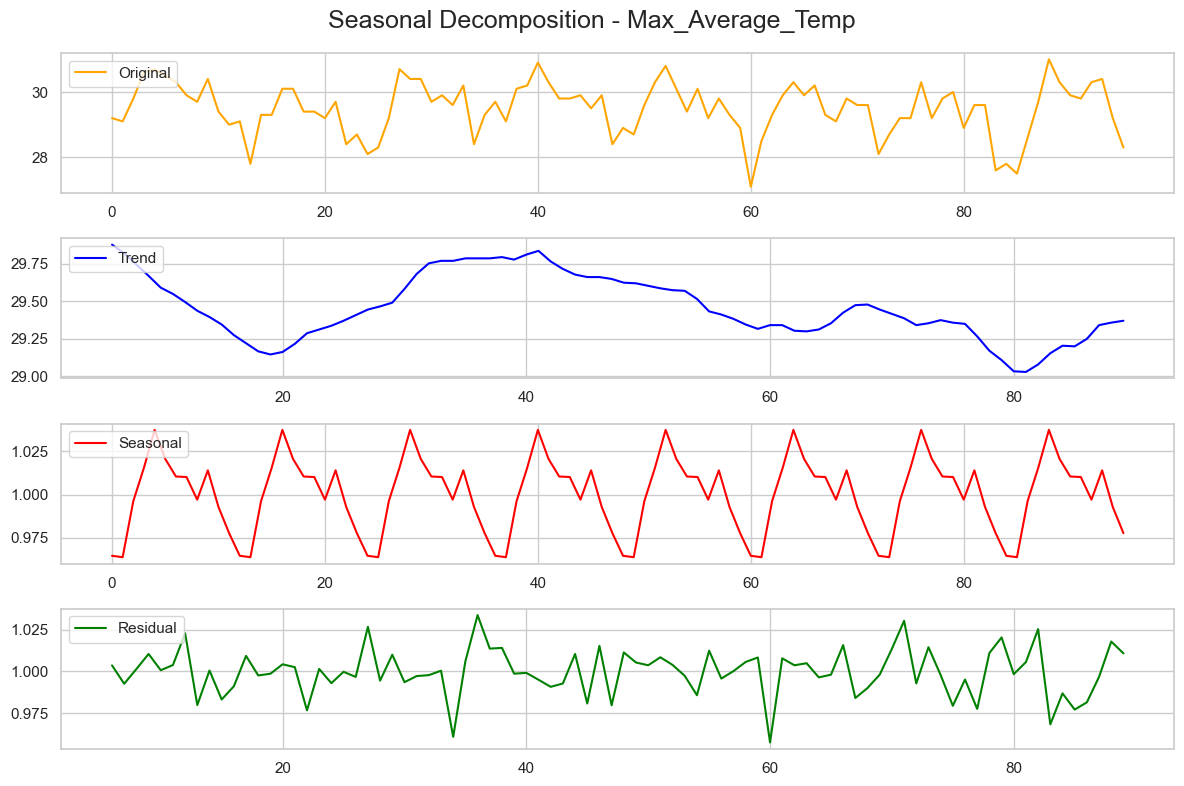

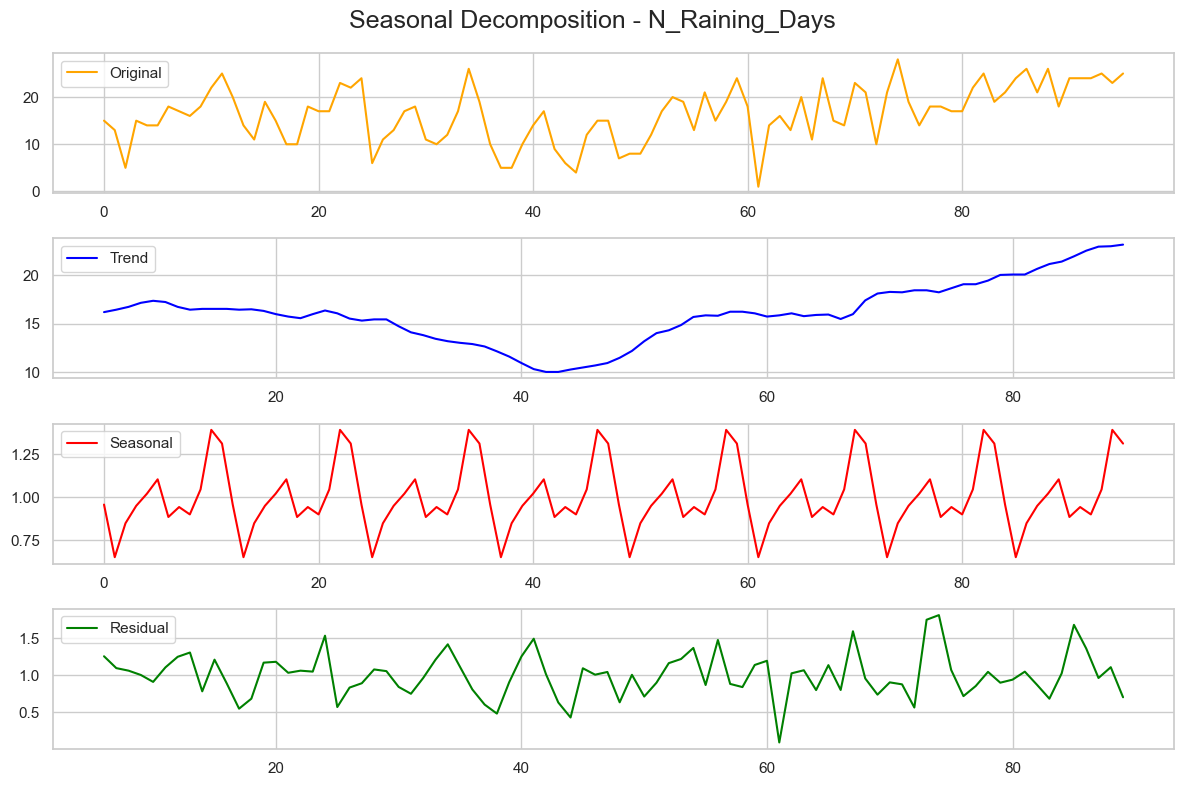

In [11]:
# Seasonality and trend exploration
# Perform seasonal decomposition for non-stationary variables using ist of non-stationary variables

# Perform seasonal decomposition and plot for each non-stationary variable
for variable in non_stationary:
    result = seasonal_decompose(df_3[variable], model='multiplicative', period = 12)
    
    # Access the components of the decomposition
    trend = result.trend
    seasonal = result.seasonal
    residual = result.resid
    
    # Plot the components for the current variable
    plt.figure(figsize=(12, 8))
    plt.suptitle(f"Seasonal Decomposition - {variable}", fontsize=18)
    
    plt.subplot(4, 1, 1)
    plt.plot(df_3.index, df_3[variable], label='Original', color='orange')
    plt.legend(loc='upper left')

    plt.subplot(4, 1, 2)
    plt.plot(df_3.index, trend, label='Trend', color='blue')
    plt.legend(loc='upper left')

    plt.subplot(4, 1, 3)
    plt.plot(df_3.index, seasonal, label='Seasonal', color='red')
    plt.legend(loc='upper left')

    plt.subplot(4, 1, 4)
    plt.plot(df_3.index, residual, label='Residual', color='green')
    plt.legend(loc='upper left')

    plt.tight_layout()
    plt.savefig(os.path.join(f"{location}_seasonal_decomposition.png"), dpi=200)
    plt.show()

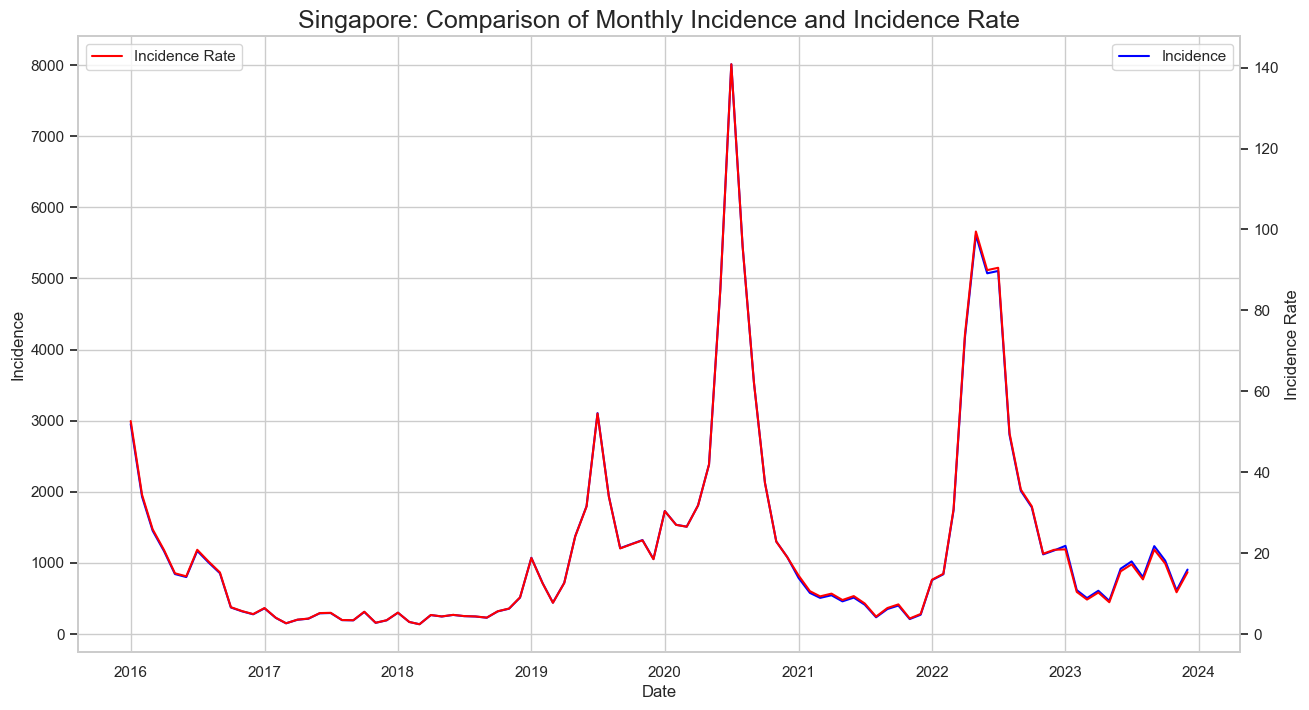

In [12]:
# Plotting Incidence Rate and Incidence to detect variation through population
# If line plots align, the capture of the population was successful

plt.figure(figsize=(15, 8))

# Plot target variable Incidence
sns.lineplot(data=df_3, x='Date', y='Incidence', color='blue', label='Incidence')

# Plot target variable Incidence Rate on the same axis
ax2 = plt.twinx()
sns.lineplot(data=df_3, x='Date', y='Incidence Rate', color='red', ax=ax2, label='Incidence Rate')

plt.title(f"{location}: Comparison of Monthly Incidence and Incidence Rate", fontsize=18)
plt.xlabel('Date')
plt.legend(loc='upper right')
ax2.legend(loc='upper left') 
plt.grid(False)
plt.show()

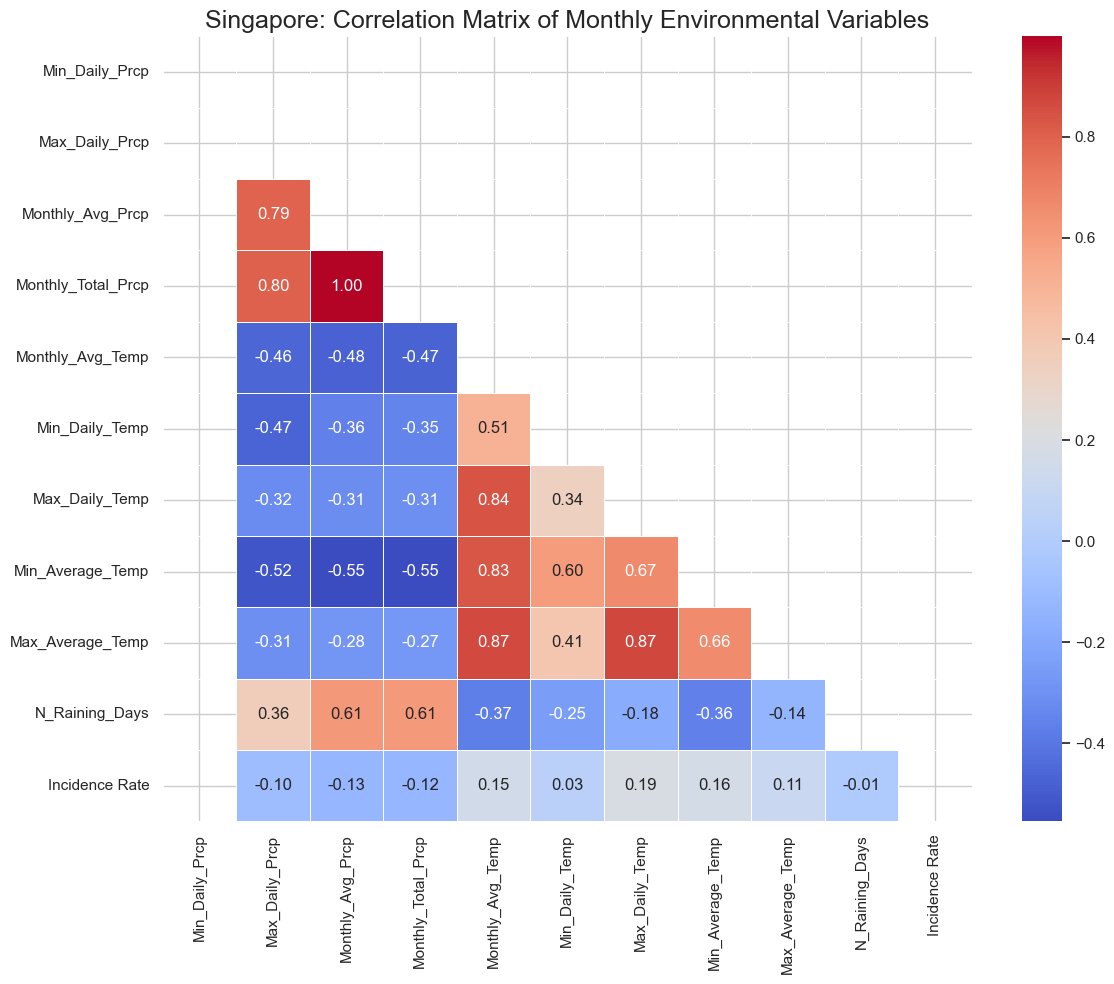

In [13]:
# Visualize the correlation using a correlation one-sided matrix

# Select the variables to compute the correlation
correlation_variables = ["Min_Daily_Prcp", "Max_Daily_Prcp", "Monthly_Avg_Prcp", 
                      "Monthly_Total_Prcp", "Monthly_Avg_Temp", "Min_Daily_Temp", 
                      "Max_Daily_Temp", "Min_Average_Temp", "Max_Average_Temp", 
                      "N_Raining_Days", "Incidence Rate"]

# Create a correlation matrix
correlation_matrix = df_3[correlation_variables].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Heatmap creation
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', annot=True, fmt="0.2f", linewidths=0.5)
plt.title(f"{location}: Correlation Matrix with Monthly Environmental Variables", fontsize=18)
plt.savefig(os.path.join(f"{location}_correlation_matrix_monthly.png"), dpi=200, bbox_inches='tight')
plt.tight_layout()
plt.show()

#### Result

The feature Min_Daily_Prcp, which represents the minimum daily precipitation, shows limited significance with 0 mm in most cases. Some variables revealded high correlation, which removal will be discussed in notebook 3 to avoid multicollinearity.
Exploratory visualizations indicate outliers, which will be addressed subsequently.

The bivariate analysis does not reveal a strong relationship with the target variable. Consequently, the correlation matrix shows low significance with the target variable across the independent variables.

## 3. Data Preprocessing

In the first notebook's data preprocessing, missing values of the raw data were imputed. This step also involves location-specific preprocessing to treat outliers. Subsequent notebook 3, which contains the combined datasets of all locations, performs further data preparation.

### a. Outlier Detection 

The main objective is to find a balance by reducing noise and allowing the dynamic nature of the environmental features. As emphasized, extreme weather events such as flushing have a tremendous effect on the mosquito habitat and, consequently, disease transmission. Accordingly, methods like outlier removal and trimming through IQR were disregarded.

At first, the standard deviation method is conducted to explore outliers with a standard deviation far from the mean. Outlier capping would not be beneficial for the identification as it determines outliers for all variables within a specified percentile. Therefore, it simply defines the most profound values. Nevertheless, outlier capping is an elegant approach for outlier treatment that preserves integrity, improves interpretability, and avoids overfitting. There are two approaches: Floor capping values below a certain threshold and ceiling replacing values above the threshold. 

Sources:
- Outlier capping: https://medium.com/analytics-vidhya/outlier-detection-in-machine-learning-382557c775aa
- IQR: https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/

In [14]:
# Using the standard deviation method to detect outliers

# Calculate mean and standard deviation only for environmental variables
means = df_3[environmental_variables].mean()
stds = df_3[environmental_variables].std()

# Defining the threshold
threshold = 4

# Identify outliers for each environmental variable
outliers = {}
for variable in environmental_variables:
    outlier_indices = np.abs(df_3[variable] - means[variable]) > threshold * stds[variable]
    outliers[variable] = df_3.loc[outlier_indices, variable].tolist()

print("Outliers identified using the Standard Deviation Method:")
for variable, values in outliers.items():
    values.sort()
    print(f"{variable}: {values}")

Outliers identified using the Standard Deviation Method:
Max_Daily_Prcp: [222.5, 238.5]
Monthly_Avg_Prcp: [22.341935483870966]
Monthly_Total_Prcp: [692.5999999999999]
Monthly_Avg_Temp: []
Min_Daily_Temp: []
Max_Daily_Temp: []
Min_Average_Temp: []
Max_Average_Temp: []
N_Raining_Days: []
Min_Daily_Prcp: []


In [15]:
# Define a threshold for z-score beyond which a data point is considered an outlier

# Calculate z-scores for each environmental variable
z_scores = (df_3[environmental_variables] - df_3[environmental_variables].mean()) / df_3[environmental_variables].std()

# Defining the threshold
threshold = 3

# Identify outliers for each environmental variable
outliers = {}
for variable in environmental_variables:
    outlier_indices = np.abs(z_scores[variable]) > threshold
    outliers[variable] = df_3.loc[outlier_indices, variable].tolist()

print("Outliers identified using the Z-Score Method:")
for variable, values in outliers.items():
    values.sort()
    print(f"{variable}: {values}")

Outliers identified using the Z-Score Method:
Max_Daily_Prcp: [222.5, 238.5]
Monthly_Avg_Prcp: [22.341935483870966]
Monthly_Total_Prcp: [692.5999999999999]
Monthly_Avg_Temp: []
Min_Daily_Temp: [18.36194782343748, 18.38621432273346]
Max_Daily_Temp: []
Min_Average_Temp: [22.9]
Max_Average_Temp: [27.1]
N_Raining_Days: []
Min_Daily_Prcp: []


In [16]:
# Check quantiles before applying outlier capping
# Quartiles divide the data into four equal parts, with Q2 being the median

# Dictionary to store outliers for each variable
outliers = {}

# Iterate over each variable
for variable in environmental_variables:
    
    # Calculate the first and third quartile of each variable
    Q1 = df_3[variable].quantile(0.15)
    Q3 = df_3[variable].quantile(0.85)
            
    # Calculating the IQR range
    IQR = Q3 - Q1

    # Calculating the lower and upper bound/whisker
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    # Identify outliers
    outlier_indices = (df_3[variable] < lower_bound) | (df_3[variable] > upper_bound)
    outliers[variable] = df_3.loc[outlier_indices, variable].tolist()

# Print outliers for each variable outside the loop
print("Outliers identified using the IQR Method:")
for variable, values in outliers.items():
    values.sort()
    print(f"{variable}: {values}")

Outliers identified using the IQR Method:
Max_Daily_Prcp: [222.5, 238.5]
Monthly_Avg_Prcp: [22.341935483870966]
Monthly_Total_Prcp: [692.5999999999999]
Monthly_Avg_Temp: []
Min_Daily_Temp: [18.36194782343748, 18.38621432273346]
Max_Daily_Temp: []
Min_Average_Temp: []
Max_Average_Temp: []
N_Raining_Days: []
Min_Daily_Prcp: []


#### Results

Outlier detection was performed for each location using the z-score and standard deviation method. Observations beyond a threshold of 2 or 3 standard deviations from the mean are considered outliers. Here, I experimented with a threshold of 3 and 4 and concluded that 4 was a better fit. The outcome of the outlier detection was compared with the IQR method. Visualizations were used to support the assessment. In conclusion, the 15/85 split was chosen to maintain analytical integrity while tolerating the complexities of environmental data.

### b. Outlier Removal

After detection was susccessful, final removal is performed.

In [17]:
# Capping Function
# Inspiration: https://wellsr.com/python/outlier-data-handling-with-python/#:~:text=Capping%20Outliers%20using%20Fixed%20Quantiles&text=In%20such%20cases%20you%20can,the%20records%20in%20the%20dataset.

def outlier_capping(data, outlier_variables):
    # Create a copy of the original data to avoid modifying it directly
    # data = data.copy()

    # Loops through each feature with outliers.
    for variable in outlier_variables:

            # Defines the first and third quantile of each feature.
            Q1 = data[variable].quantile(0.15)
            Q3 = data[variable].quantile(0.85)

            # Calculating the IQR range.
            IQR = Q3 - Q1

            # Calculating the lower and upper bound/whisker
            lower_bound = Q1 - (1.5 * IQR)
            upper_bound = Q3 + (1.5 * IQR)

            # Replaces all values below the lower bound and
            # above the upper bound with the lower or upper bound values.
            data[variable] = np.where(data[variable] > upper_bound, upper_bound,
                                        np.where(data[variable] < lower_bound, lower_bound,
                                                  data[variable]))
    return data

In [18]:
outlier_capping(df_3, environmental_variables)

,Year,Month,Date,Incidence,Population,Incidence Rate,Name,Min_Daily_Prcp,Max_Daily_Prcp,Monthly_Avg_Prcp,Monthly_Total_Prcp,Monthly_Avg_Temp,Min_Daily_Temp,Max_Daily_Temp,Min_Average_Temp,Max_Average_Temp,N_Raining_Days
0,2016,1,2016-01-01,2953,5610000,52.638146,"SINGAPORE CHANGI INTERNATIONAL, SN",0.0,55.9,4.500000,139.5,28.380645,21.259979,32.800000,25.3,29.2,15.0
1,2016,2,2016-02-01,1931,5610000,34.420677,"SINGAPORE CHANGI INTERNATIONAL, SN",0.0,71.9,6.424138,186.3,27.917241,20.703921,32.700000,25.1,29.1,13.0
2,2016,3,2016-03-01,1452,5610000,25.882353,"SINGAPORE CHANGI INTERNATIONAL, SN",0.0,2.3,0.164516,5.1,29.045161,24.669344,34.100000,28.0,29.8,5.0
3,2016,4,2016-04-01,1166,5610000,20.784314,"SINGAPORE CHANGI INTERNATIONAL, SN",0.0,21.8,3.006667,90.2,29.503333,25.300000,35.000000,28.4,30.6,15.0
4,2016,5,2016-05-01,842,5610000,15.008913,"SINGAPORE CHANGI INTERNATIONAL, SN",0.0,54.9,6.251613,193.8,29.374194,23.900000,34.600000,27.7,30.7,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2023,8,2023-08-01,799,5920000,13.496622,"SINGAPORE CHANGI INTERNATIONAL, SN",0.0,24.4,7.429032,230.3,28.606452,23.081562,33.870540,25.7,29.8,24.0
92,2023,9,2023-09-01,1235,5920000,20.861486,"SINGAPORE CHANGI INTERNATIONAL, SN",0.0,48.0,12.283333,368.5,28.740000,23.300000,33.814781,26.4,30.3,24.0
93,2023,10,2023-10-01,1030,5920000,17.398649,"SINGAPORE CHANGI INTERNATIONAL, SN",0.0,38.4,8.470968,262.6,28.987097,24.026914,34.349287,26.9,30.4,25.0
94,2023,11,2023-11-01,611,5920000,10.320946,"SINGAPORE CHANGI INTERNATIONAL, SN",0.0,40.9,6.500000,195.0,27.750000,23.711797,33.500000,26.4,29.2,23.0


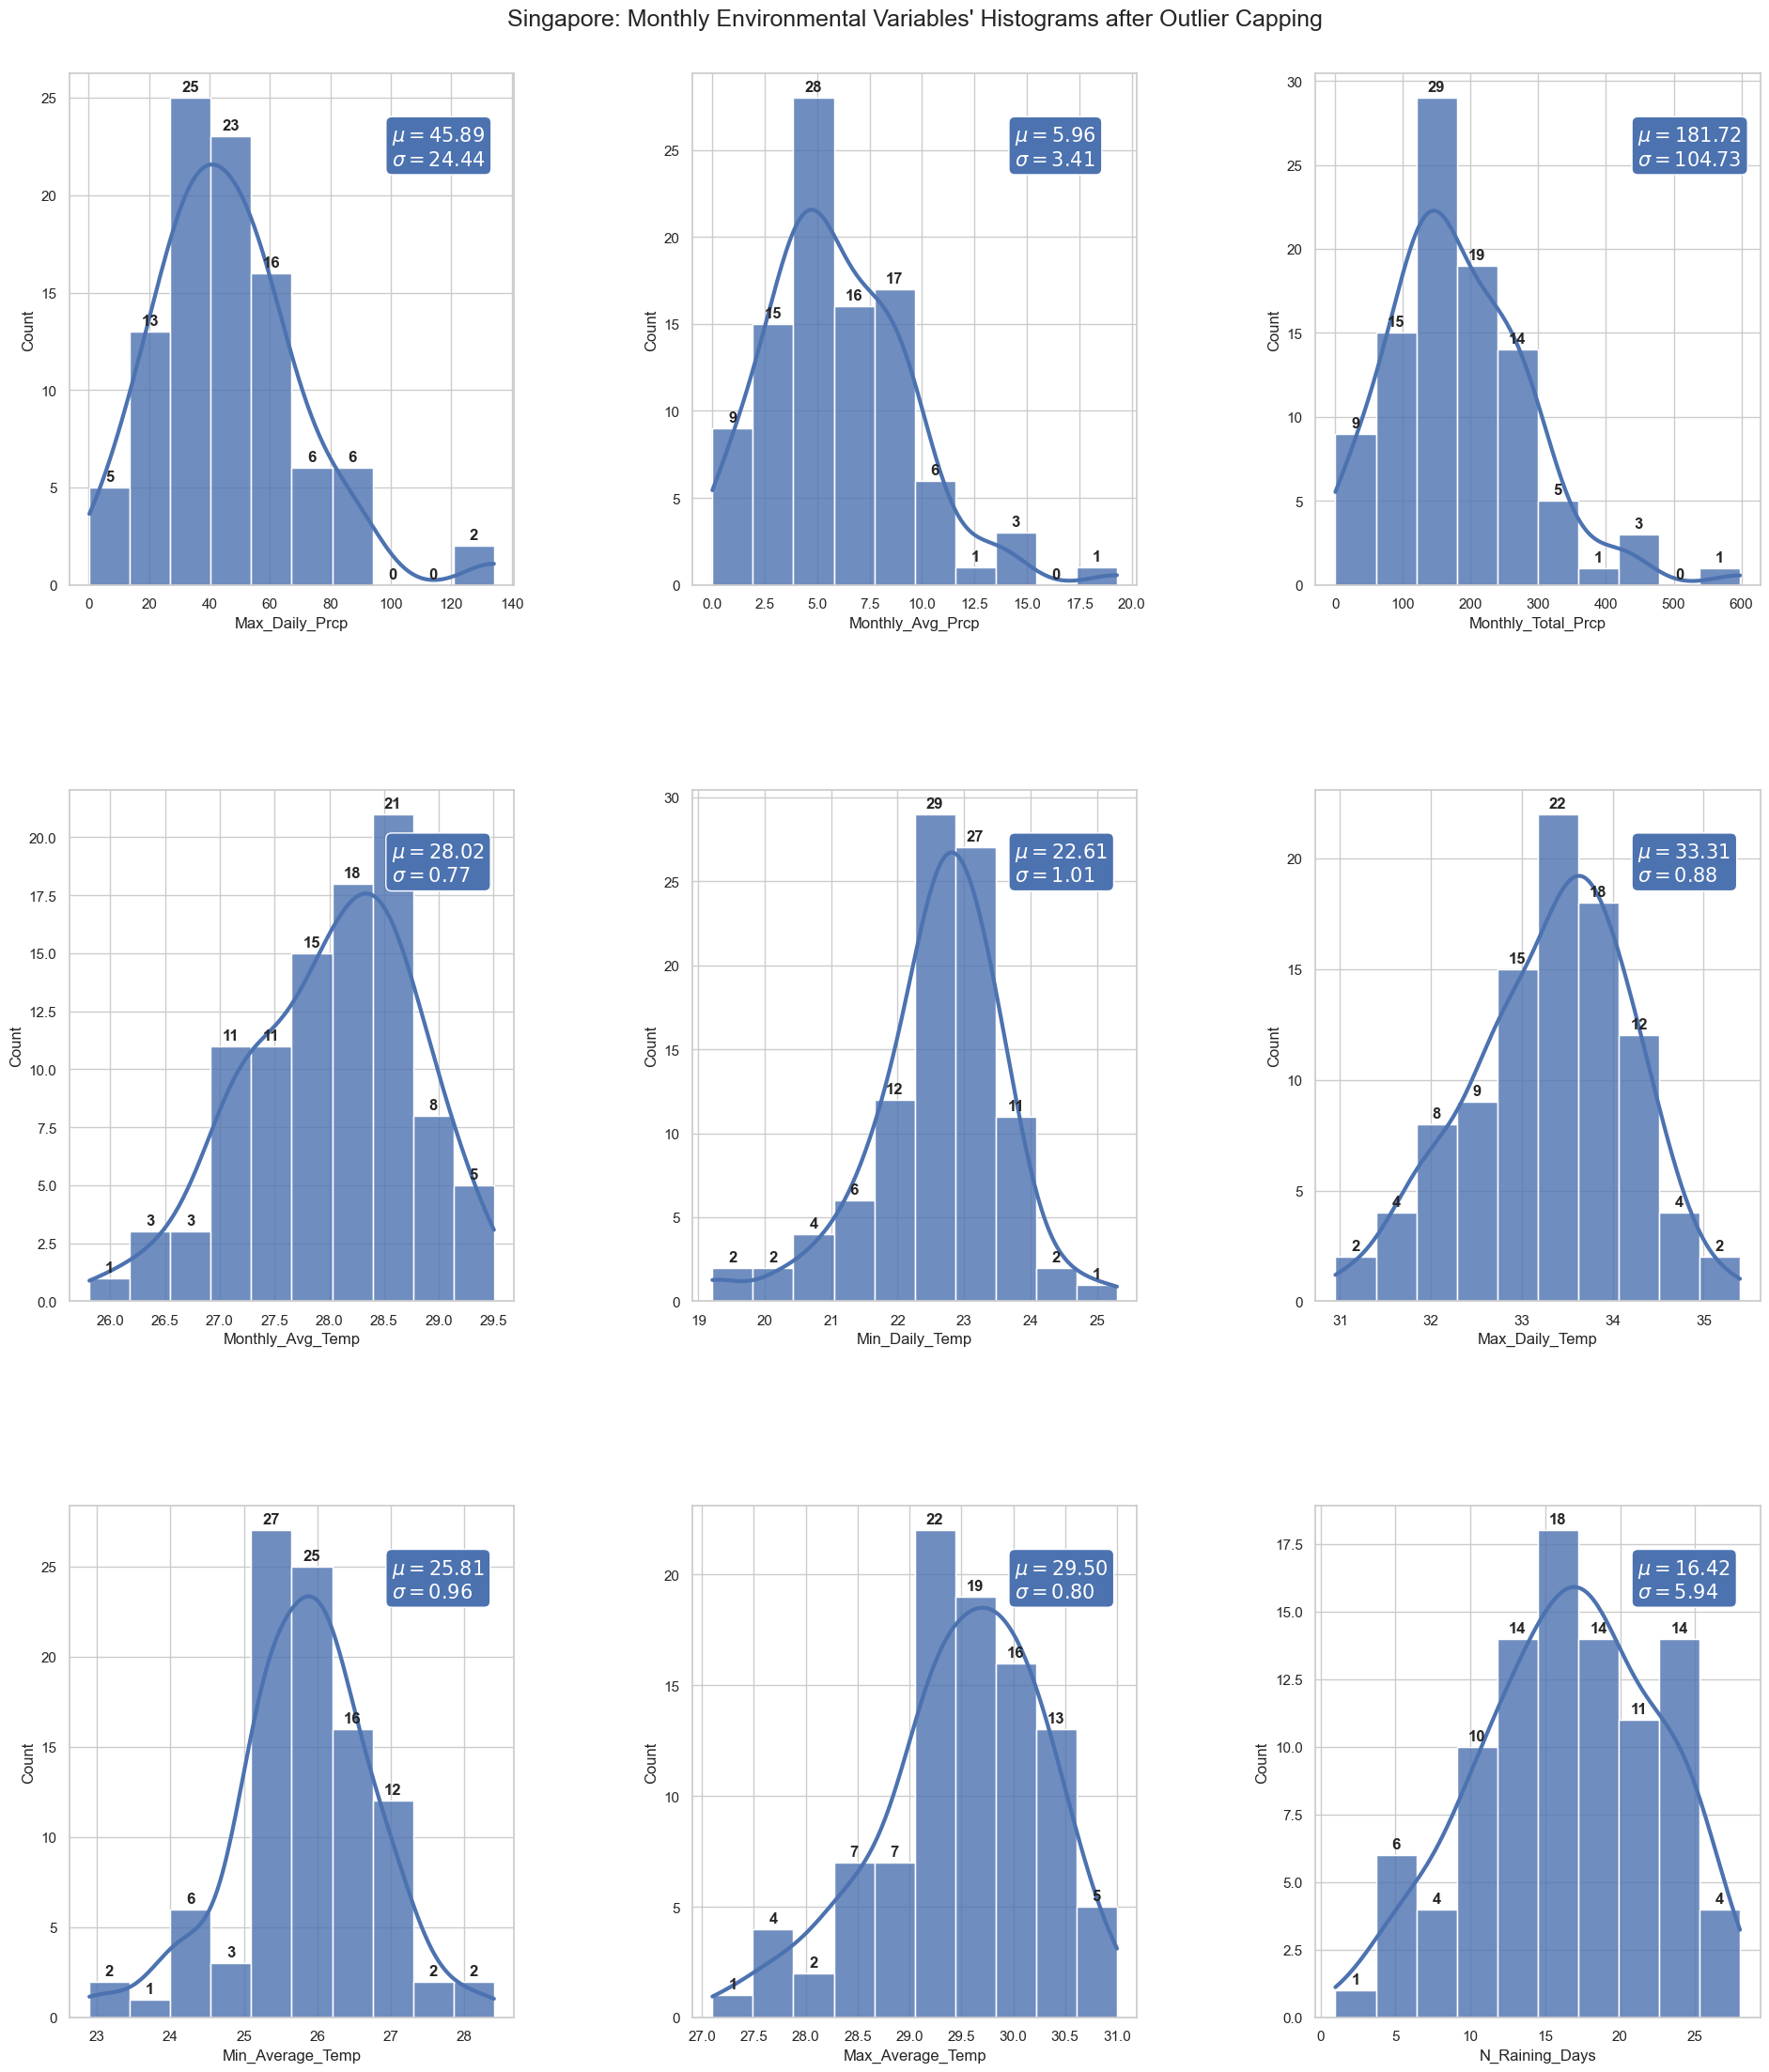

In [19]:
# Histogram to confirm successful outlier removal

fig, axes = plt.subplots(3, math.ceil(len(environmental_variables) / 4), figsize=(20, 23))

for ax, feat in zip(axes.flatten(), environmental_variables):
    ax.set_ylabel('Count')
    # Plot histogram
    counts, bins, patches = ax.hist(df_3[feat].dropna(), alpha=0.6) 
    
    # Adding KDE and statistics
    sns.histplot(data=df_3, x=feat, bins=bins, kde=True, ax=ax, line_kws={'lw': 3})
    
    # Adding annotations for counts
    for count, patch in zip(counts, patches):
        ax.annotate(str(int(count)), xy=(patch.get_x() + patch.get_width() / 2, patch.get_height()),
                    xytext=(0, 5), textcoords='offset points',
                    ha='center', fontsize=12, fontweight='bold')
    
    # Adding mean and standard deviation text
    ax.text(0.725, 0.9, f'$\mu={df_3[feat].mean():.2f}$\n$\sigma={df_3[feat].std():.2f}$',
            transform=ax.transAxes, fontsize=15, verticalalignment='top', color='white',
            bbox=dict(boxstyle='round'))
    
plt.suptitle(f"{location}: Monthly Environmental Variables' Histograms after Outlier Capping", fontsize=18)
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, hspace=0.4, wspace=0.4)
plt.savefig(os.path.join(f"{location}_monthly_environmental_variables_histograms_outlier_removal.png"), dpi=200)
plt.show()

### 4. Export

In [20]:
# Different approaches will be tested for modeling; therefore, location-specific outlier capping was performed in this notebook.
# Saving df_3 without outliers for each dataset, this way, location-specific anomalies can be captured.
#capped_file = "/Users/Fine/Documents/Master Business Analytics/Thesis/Research Data/Final Data/Singapore/Singapore 3.xlsx"
#df_3.to_excel(capped_file, index=False, sheet_name="Monthly Data")